In [116]:
from ase.io.cube import read_cube_data
import pandas as pd
import numpy as np
from ase import Atoms
from ase.visualize import view
import math
import matplotlib.pyplot as plt
import os

In [199]:
def scatterweight (target,ICISS):

    df = pd.read_table(target)
    X = list(df['rx'])
    Y = list(df['ry'])
    bx,by = max(X)-min(X),max(Y)-min(Y)
    print([bx,by])

    atom = pd.read_table(ICISS,delim_whitespace=True,names = ('x','y','z','Z','m','f'))

    #find the top unblocked atoms
    toplist = []    
    for index, row in atom.iterrows():
        k=0
        for a in toplist:
            rowa = atom.loc[a]
            if np.sqrt((rowa['x']-row['x'])**2+(rowa['y']-row['y'])**2)<0.4:
                if rowa['z']>row['z']:
                    k=1
                else:
                    toplist.remove(a)
        if k==0:
            toplist.append(index)
    print(toplist)

    counts = [0]*atom.shape[0]
    for x,y in zip(X,Y):
        dmin = 500
        index_min = -1
        for a in toplist:
            lx = abs(atom.loc[a]['x']-x)
            ly = abs(atom.loc[a]['y']-y)
            l = min(lx,bx-lx)**2+min(ly,by-ly)**2
            if  l < dmin:
                dmin = l
                index_min = a
        counts[index_min] += 1

    atom['count']=counts



    atom['sum'] = atom.groupby('Z')['count'].transform('sum')
    atom['perc'] = (atom['count']/atom['sum']).round(3)
    atom.head(10)


    topIn = atom.loc[toplist].query('Z ==49')
    topAs = atom.loc[toplist].query('Z ==33')
    In_X = list(topIn['x'])
    In_Y = list(topIn['y'])
    As_X = list(topAs['x'])
    As_Y = list(topAs['y'])
    plt.figure(figsize=(5,10))
    plt.scatter(X,Y,marker='.')
    plt.scatter(In_X,In_Y,marker='*',s=100)
    plt.scatter(As_X,As_Y,marker='o',s=150)
    
    return topIn['perc'],topAs['perc']
    

[8.541394, 17.075159]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32, 36, 41, 42, 45, 46]


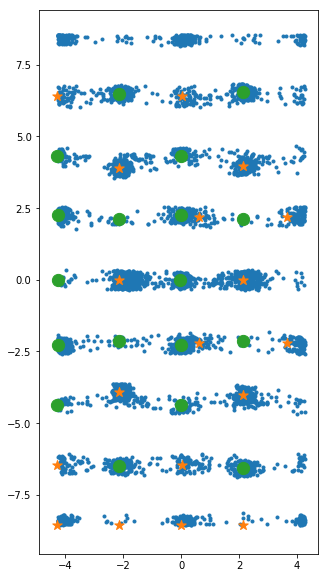

In [200]:
target = 'dftzetaA.txt'
ICISS = 'zetaA.txt'

In_list,As_list = scatterweight (target,ICISS)

In [201]:
In_list

4     0.103
5     0.099
6     0.081
7     0.154
8     0.082
9     0.086
10    0.116
11    0.086
16    0.026
17    0.021
18    0.021
19    0.027
20    0.030
21    0.014
22    0.012
23    0.028
32    0.007
36    0.008
Name: perc, dtype: float64

In [209]:
As_list.index

Int64Index([0, 1, 2, 3, 12, 13, 14, 15, 25, 26, 27, 29, 30, 31, 41, 42, 45,
            46],
           dtype='int64')

In [214]:
for i in In_list.index:
    print(i,In_list.loc[i])

4 0.103
5 0.099
6 0.081
7 0.154
8 0.082
9 0.086
10 0.116
11 0.086
16 0.026
17 0.021
18 0.021
19 0.027
20 0.03
21 0.014
22 0.012
23 0.028
32 0.007
36 0.008
